In [19]:
import argparse
import datetime
import math
import os
import sys
import random
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from omegaconf import OmegaConf
sys.path.append('/data2/youngju/kimst24')

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, Subset, random_split
from torchvision import datasets, models, transforms
from tqdm.auto import tqdm
from utils.load_dataset import get_CUB_loaders

In [20]:
parser = argparse.ArgumentParser()
parser.add_argument("--data-path", type=str, default="/data/CUB_200_2011/images")
parser.add_argument("--model-path", type=str, default="//data2/youngju/kimst24/outputs_backup/clf_checkpoints/2024-05-01_204226/clf_ep-24_lr-0.001_val-acc-0.7630.pth")
parser.add_argument("--pickle-path", type=str, default="/data2/youngju/kimst24/outputs/get_config/test")
parser.add_argument("--phase", type=str, default="test")
parser.add_argument("--num-pickle", type=int, default=4)
parser.add_argument("--seed", type=int, default=0)
parser.add_argument("--batch-size", type=int, default=512)
parser.add_argument("--device", type=str, default="cuda:5")
parser.add_argument("--train-ratio", type=float, default=0.7)

args = parser.parse_args(args=[])

In [21]:
MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

random.seed(args.seed)
torch.manual_seed(args.seed)
cudnn.deterministic = True
cudnn.benchmark = False

# (train_loader, train_data_len) = get_CUB_loaders(args.data_path, args.batch_size, args.train_ratio, train=True)
# (val_loader, test_loader, valid_data_len, test_data_len) = get_CUB_loaders(args.data_path, int(args.batch_size/2), args.train_ratio, train=False)

In [13]:
model = models.resnet50(pretrained=False)
model.fc = nn.Linear(2048, 200)
model.load_state_dict(torch.load(args.model_path))
model = model.to(args.device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
## activation
ac_list = []
for i in tqdm(range(args.num_pickle)): # pickle 파일 개수
    with open(f"{args.pickle_path}/{args.phase}_activation_{i}.pkl","rb") as fr:
        ac_batch = pickle.load(fr)
    ac_list.append(ac_batch[-1]) # 마지막 relu
ac_total = torch.cat(ac_list, dim=0)
with open(f"{args.pickle_path}/total_activation.pkl", "wb") as fw:
    pickle.dump(ac_total, fw)

  0%|          | 0/14 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [6]:
### eq
eq_list = []
for i in tqdm(range(args.num_pickle)): # pickle 파일 개수
    with open(f"{args.pickle_path}/{args.phase}_eq_{i}.pkl","rb") as fr:
        eq = pickle.load(fr)
    eq_list.append(eq)
eq_total = torch.cat(eq_list, dim=0)
with open(f"{args.pickle_path}/total_eq.pkl", "wb") as fw:
    pickle.dump(eq_total, fw)

100%|██████████| 14/14 [00:00<00:00, 6543.38it/s]


In [7]:
### x
x_list = []
for i in tqdm(range(args.num_pickle)): # pickle 파일 개수
    with open(f"{args.pickle_path}/{args.phase}_x_{i}.pkl","rb") as fr:
        x = pickle.load(fr)
    x_list.append(x)
x_total = torch.cat(x_list, dim=0)
with open(f"{args.pickle_path}/total_x.pkl", "wb") as fw:
    pickle.dump(x_total, fw)

100%|██████████| 14/14 [00:03<00:00,  4.47it/s]


In [8]:
### y
y_list = []
for i in tqdm(range(args.num_pickle)): # pickle 파일 개수
    with open(f"{args.pickle_path}/{args.phase}_y_{i}.pkl","rb") as fr:
        y = pickle.load(fr)
    y_list.append(y)
y_total = torch.cat(y_list, dim=0)
with open(f"{args.pickle_path}/total_y.pkl", "wb") as fw:
    pickle.dump(y_total, fw)

100%|██████████| 14/14 [00:00<00:00, 4100.86it/s]


In [9]:
### preds
preds_list = []
for i in tqdm(range(args.num_pickle)): # pickle 파일 개수
    with open(f"{args.pickle_path}/{args.phase}_preds_{i}.pkl","rb") as fr:
        preds = pickle.load(fr)
    preds_list.append(preds)
preds_total = torch.cat(preds_list, dim=0)
with open(f"{args.pickle_path}/total_preds.pkl", "wb") as fw:
    pickle.dump(preds_total, fw)

100%|██████████| 14/14 [00:00<00:00, 3168.93it/s]


In [22]:
### probs
probs_list = []
for i in tqdm(range(args.num_pickle)): # pickle 파일 개수
    with open(f"{args.pickle_path}/{args.phase}_probs_{i}.pkl","rb") as fr:
        probs = pickle.load(fr)
    probs_list.append(probs)
probs_total = torch.cat(probs_list, dim=0)
with open(f"{args.pickle_path}/total_probs.pkl", "wb") as fw:
    pickle.dump(probs_total, fw)

100%|██████████| 4/4 [00:00<00:00, 258.63it/s]


In [23]:
probs_total

tensor([0.6797, 0.6701, 0.7564,  ..., 0.6542, 0.6648, 0.2064], device='cuda:5')

(array([268., 231., 164., 139., 136., 149., 177., 250., 189.,  66.]),
 array([0.0262333 , 0.11797345, 0.20971359, 0.30145374, 0.39319387,
        0.48493403, 0.57667416, 0.66841429, 0.76015449, 0.85189462,
        0.94363475]),
 <BarContainer object of 10 artists>)

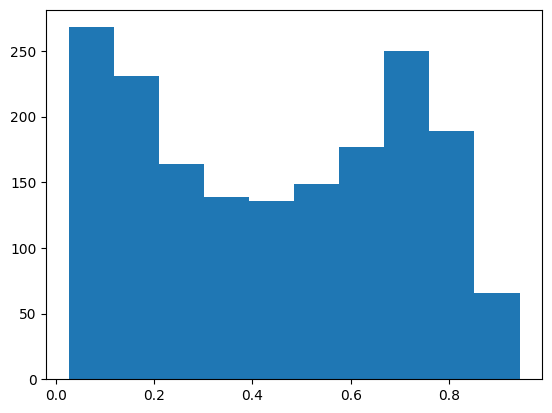

In [24]:
import matplotlib.pyplot as plt
plt.hist(probs_total.cpu().numpy())